## Tugas Klasifikasi Kelompok 9

Anggota kelompok :
- Adinda Salsabilla (2005319)
- Alif Faturahman Firdaus (2107377)
- Farah Balqist (2007339)
- Sukma Julianti (2009110)
- Wildan Mauli Darojat (2106330)

## Sumber dataset

Data yang kami gunakan di dapat dari : https://drive.google.com/file/d/1OE1ABaGjzkbUjqT5DsgkLAQCvZ3NGuU4/view?usp=sharing

## Task
Memprediksi apakah setelah membeli customer akan mengembalikan barang (di Eropa ada perlindungan konsumen yang membuat konsumen dapat mengembalikan barang tanpa alasan asal dalam periode tertentu). Pengembalian barang yang berlebih dapat merugikan pemilik toko.

Terdapat 481000 data transaksi yang dapat digunakan untuk membuat model. Atribut target (yang akan diprediksi) adalah "returnShipment" (atribut terakhir) yang bernilai 0 jika item disimpan pembeli dan bernilai 1 jika item dikembalikan. 

Yang harus dilakukan: 
1. Lakukan praproses dan EDA (exploratory data analysis) terhadap data ini, tuliskan analisis di dalam notebook.
2. Buat model berdasarkan data train (orders_train), coba berbagai model, ukur kinerja tiap model. Lakukan utak-atik 
3. Buat prediksi. Terdapat 50000 data yang harus diprediksi (returnShimpemnt) yang disimpan di orders_class.txt

## Penjelasan Fitur
- orderItemID: id order
- orderDate: tanggal pemesanan
- itemID: id item
- color: warna item
- price: harga item
- salutation: panggilan customer (Mr, Mrs)
- state: wilayah
- deliveryDate: tanggal penyerahan
- size: ukuran item
- manufacturerID: id pembuat item
- customerID: id customer
- dateOfBirth: tanggal lahir customer
- creationDate: tanggal pembuatan account
- returnShipment: apakah akan dikembalikan, 1: dikembalikan; 0 tidak

## Praproses Dataset order_train.csv

### Import Library

In [1]:
%matplotlib inline
import numpy as np                  
import pandas as pd                 
import matplotlib.pyplot as plt     
import seaborn as sns
import joblib
from datetime import datetime, date

### Load Dataset

In [2]:
df = pd.read_csv("C:\\Users\\Lenovo\\datmin python\\orders_train.csv", sep=",", encoding="utf-8")
df.head()

,orderItemID,orderDate,deliveryDate,itemID,size,color,manufacturerID,price,customerID,salutation,dateOfBirth,state,creationDate,returnShipment
0,1,4/1/2012,4/3/2012,186,m,denim,25,69.90,794,Mrs,1/6/1965,Baden-Wuerttemberg,4/25/2011,0
1,2,4/1/2012,4/3/2012,71,9+,ocher,21,69.95,794,Mrs,1/6/1965,Baden-Wuerttemberg,4/25/2011,1
2,3,4/1/2012,4/3/2012,71,9+,curry,21,69.95,794,Mrs,1/6/1965,Baden-Wuerttemberg,4/25/2011,1
3,4,4/2/2012,?,22,m,green,14,39.90,808,Mrs,11/9/1959,Saxony,1/4/2012,0
4,5,4/2/2012,12/31/1990,151,39,black,53,29.90,825,Mrs,7/11/1964,Rhineland-Palatinate,2/16/2011,0


In [3]:
#menampilkan dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481092 entries, 0 to 481091
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   orderItemID     481092 non-null  int64  
 1   orderDate       481092 non-null  object 
 2   deliveryDate    481092 non-null  object 
 3   itemID          481092 non-null  int64  
 4   size            481092 non-null  object 
 5   color           481092 non-null  object 
 6   manufacturerID  481092 non-null  int64  
 7   price           481092 non-null  float64
 8   customerID      481092 non-null  int64  
 9   salutation      481092 non-null  object 
 10  dateOfBirth     481092 non-null  object 
 11  state           481092 non-null  object 
 12  creationDate    481092 non-null  object 
 13  returnShipment  481092 non-null  int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 51.4+ MB


In [4]:
#melihat apakah terdapat value null dalam suatu atribut
df.isnull().sum()

orderItemID       0
orderDate         0
deliveryDate      0
itemID            0
size              0
color             0
manufacturerID    0
price             0
customerID        0
salutation        0
dateOfBirth       0
state             0
creationDate      0
returnShipment    0
dtype: int64

### Cek Setiap Kolom yang Memiliki Value '?'

In [5]:
#buat variabel baru berupa kolom1, kolom2, dan kolom3 untuk menyimpan hasil kolom yang memiliki value '?'
kolom1 = df[df['color'] == '?'] 
kolom2 = df[df['deliveryDate'] == '?'] 
kolom3 = df[df['dateOfBirth'] == '?'] 

kolom1 #command untuk menampilkan tabel
# kolom2
# kolom3

,orderItemID,orderDate,deliveryDate,itemID,size,color,manufacturerID,price,customerID,salutation,dateOfBirth,state,creationDate,returnShipment
141039,141040,7/23/2012,7/24/2012,1904,unsized,?,125,0.0,21343,Mrs,?,North Rhine-Westphalia,5/20/2012,0
148001,148002,8/2/2012,8/24/2012,2103,unsized,?,125,0.0,20016,Mrs,12/22/1965,Bavaria,2/16/2011,0
150555,150556,8/4/2012,8/28/2012,2108,unsized,?,125,25.0,39327,Mrs,9/4/1972,Lower Saxony,9/24/2011,0
150749,150750,8/4/2012,8/28/2012,2108,unsized,?,125,25.0,39374,Mrs,7/1/1971,North Rhine-Westphalia,2/23/2012,0
154052,154053,8/6/2012,8/29/2012,2108,unsized,?,125,25.0,39848,Mrs,11/24/1958,North Rhine-Westphalia,2/17/2012,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290835,290836,11/29/2012,11/30/2012,2103,unsized,?,125,0.0,33472,Mrs,11/14/1964,Bremen,6/29/2012,0
295640,295641,12/6/2012,?,1904,unsized,?,125,0.0,60704,Mrs,?,Bavaria,11/1/2012,0
298168,298169,12/10/2012,12/20/2012,2103,unsized,?,125,0.0,64824,Mrs,6/20/1965,Hesse,2/16/2011,0
298816,298817,12/11/2012,12/17/2012,2103,unsized,?,125,0.0,8563,Mrs,9/23/1959,Hamburg,5/6/2012,0


Setelah dicek, terdapat 3 kolom yang memiliki nilai '?'. Kolom 'color', 'deliveryDate', dan 'dateOfBirth'

### Menyimpan dan Menampilkan Nilai Modus Kolom 'color', 'deliveryDate', dan 'dateOfBirth'

In [6]:
#buat variabel untuk menyimpan modus
modus_color = df['color'].mode()
modus_del_date = df['deliveryDate'].mode()
modus_birth = df['dateOfBirth'].mode()

#menampilkan modus
print(modus_color)
print(modus_del_date)
print(modus_birth)

0    black
Name: color, dtype: object
0    ?
Name: deliveryDate, dtype: object
0    ?
Name: dateOfBirth, dtype: object


Kolom 'color' memiliki nilai modus 'black'. Sedangkan kolom 'deliveryDate' dan 'dateOfBirth' memiliki nilai modus '?'

### Replace Karakter '?' Menjadi String Menggunakan Pandas

In [7]:
df.color = df.color.str.replace('?', 'String color')
df.dateOfBirth = df.deliveryDate.str.replace('?', 'String delivery')
df.deliveryDate = df.dateOfBirth.str.replace('?', 'String birthDate')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14556\88975719.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.color = df.color.str.replace('?', 'String color')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14556\88975719.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.dateOfBirth = df.deliveryDate.str.replace('?', 'String delivery')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14556\88975719.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.deliveryDate = df.dateOfBirth.str.replace('?', 'String birthDate'

Fungsi replace hanya dapat digunakan untuk string, sedangkan '?' merupakan single character sehingga muncul warning/peringatan

In [8]:
#menampilkan data teratas
df.head()

,orderItemID,orderDate,deliveryDate,itemID,size,color,manufacturerID,price,customerID,salutation,dateOfBirth,state,creationDate,returnShipment
0,1,4/1/2012,4/3/2012,186,m,denim,25,69.90,794,Mrs,4/3/2012,Baden-Wuerttemberg,4/25/2011,0
1,2,4/1/2012,4/3/2012,71,9+,ocher,21,69.95,794,Mrs,4/3/2012,Baden-Wuerttemberg,4/25/2011,1
2,3,4/1/2012,4/3/2012,71,9+,curry,21,69.95,794,Mrs,4/3/2012,Baden-Wuerttemberg,4/25/2011,1
3,4,4/2/2012,String delivery,22,m,green,14,39.90,808,Mrs,String delivery,Saxony,1/4/2012,0
4,5,4/2/2012,12/31/1990,151,39,black,53,29.90,825,Mrs,12/31/1990,Rhineland-Palatinate,2/16/2011,0


### Hapus Data '?' pada Kolom 'dateOfBirth' dan 'deliveryDate'

In [9]:
# membuang data yang telah dispesifikasikan aka string delivery & string birthDate
df = df[df['deliveryDate'].str.contains('String delivery') == False]
df = df[df['dateOfBirth'].str.contains('String birthDate') == False]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 441673 entries, 0 to 481091
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   orderItemID     441673 non-null  int64  
 1   orderDate       441673 non-null  object 
 2   deliveryDate    441673 non-null  object 
 3   itemID          441673 non-null  int64  
 4   size            441673 non-null  object 
 5   color           441673 non-null  object 
 6   manufacturerID  441673 non-null  int64  
 7   price           441673 non-null  float64
 8   customerID      441673 non-null  int64  
 9   salutation      441673 non-null  object 
 10  dateOfBirth     441673 non-null  object 
 11  state           441673 non-null  object 
 12  creationDate    441673 non-null  object 
 13  returnShipment  441673 non-null  int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 50.5+ MB


### Replace Kolom 'color' dengan Nilai Modus

In [10]:
df.color = df.color.str.replace('String color', 'black') #ganti kolom 'color' dengan black

In [11]:
#menampilkan data 270 ribuan
df.head(270915)

,orderItemID,orderDate,deliveryDate,itemID,size,color,manufacturerID,price,customerID,salutation,dateOfBirth,state,creationDate,returnShipment
0,1,4/1/2012,4/3/2012,186,m,denim,25,69.90,794,Mrs,4/3/2012,Baden-Wuerttemberg,4/25/2011,0
1,2,4/1/2012,4/3/2012,71,9+,ocher,21,69.95,794,Mrs,4/3/2012,Baden-Wuerttemberg,4/25/2011,1
2,3,4/1/2012,4/3/2012,71,9+,curry,21,69.95,794,Mrs,4/3/2012,Baden-Wuerttemberg,4/25/2011,1
4,5,4/2/2012,12/31/1990,151,39,black,53,29.90,825,Mrs,12/31/1990,Rhineland-Palatinate,2/16/2011,0
5,6,4/2/2012,12/31/1990,598,xxl,brown,87,89.90,825,Mrs,12/31/1990,Rhineland-Palatinate,2/16/2011,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299810,299811,12/12/2012,12/17/2012,20,45,brown,15,59.95,23779,Mrs,12/17/2012,Lower Saxony,5/27/2012,0
299811,299812,12/12/2012,12/21/2012,2213,unsized,black,137,0.00,45664,Mrs,12/21/2012,Rhineland-Palatinate,2/16/2011,0
299812,299813,12/12/2012,12/13/2012,1526,S,aubergine,48,119.00,35568,Mrs,12/13/2012,Baden-Wuerttemberg,2/16/2011,1
299813,299814,12/12/2012,12/13/2012,874,9,brown,21,32.48,65119,Mrs,12/13/2012,Bavaria,2/16/2011,1


### Ubah Tipe Data Tanggal Menjadi Datetime

In [12]:
# df['deliveryDate'] = pd.to_datetime(df['deliveryDate'])
# df['dateOfBirth'] = pd.to_datetime(df['dateOfBirth'])
# df['orderDate'] = pd.to_datetime(df['orderDate'])
# df['creationDate'] = pd.to_datetime(df['creationDate'])
# df.info()
# Format Datetime tidak memungkinkan diproses pada naive bayes sehingga dijadikan komentar

## Exploratory Data Analysis

### Jumlah Transaksi Berdasarkan 'State'

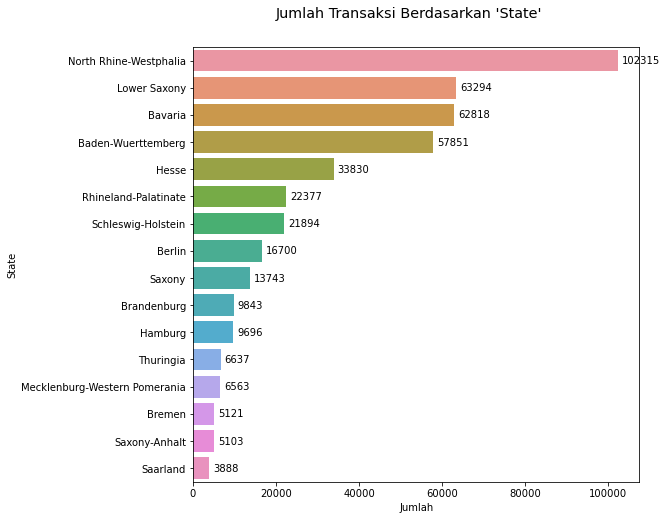

In [13]:
# tentukan besar kanvas dengan menggunakan figsize
plt.figure(figsize=(8, 8))

g = sns.countplot(y='state', data = df, order = df['state'].value_counts().index) #g = graf, countplot = menampilkan graf 
g.set(xlabel='Jumlah', ylabel='State') # x dan y label untuk nama sumbu x dan y
plt.suptitle("Jumlah Transaksi Berdasarkan 'State'", fontsize = 'x-large', fontweight = 'regular', y=0.95)

for container in g.containers: #perlu looping karena terdapat beberapa state
    g.bar_label(container, padding=4)
    
# tampilkan plot
plt.show()

Berdasarkan plot di atas Norh Rhine-Westphalia merupakan state yang melakukan transaksi paling banyak, yaitu sebanyak 102315 transaksi

### Jumlah Transaksi Berdasarkan 'Salutation'

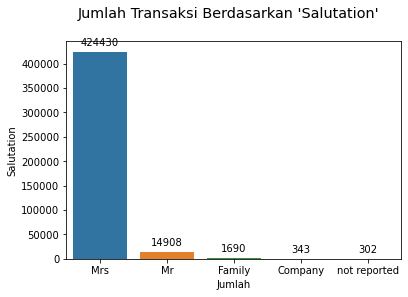

In [14]:
# tentukan besar kanvas dengan menggunakan figsize
plt.figure(figsize=(6, 4))

g = sns.countplot(x='salutation', data = df, order = df['salutation'].value_counts().index)
g.set(xlabel='Jumlah', ylabel='Salutation')
plt.suptitle("Jumlah Transaksi Berdasarkan 'Salutation'", fontsize = 'x-large', fontweight = 'regular', y=1)

for container in g.containers:
    g.bar_label(container, padding=4)
    
# menampilkan plot    
plt.show()

Berdasarkan plot di atas "Mrs" merupakan salutation (panggilan customer) yang mendominasi dalam transaksi dibandingkan dengan "Mr", "Family", "Company", dan "not reported"

### Status Pengembalian Barang Berdasarkan 'Salutation'

Text(0.5, 1.0, 'Status Pengembalian Barang Berdasarkan "Salutation"')

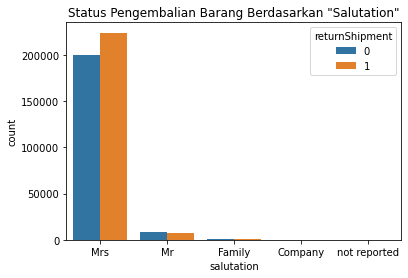

In [15]:
#melihat distribusi returnShipment
fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(ax = ax, x = "salutation", hue ="returnShipment", data = df, order=df['salutation'].value_counts().index).set_title('Status Pengembalian Barang Berdasarkan "Salutation"') 

Berdasarkan plot di atas menunjukkan bahwa salutation "Mrs" dengan pengembalian barang (returnShipment = 1) lebih dominan daripada tidak mengembalikan barang (returnShipment = 0). Selain itu, jumlah salutation "Mrs" lebih banyak mengembalikan barang dibandingkan salutation lainnya.

### Boxplot Atribut Price

<AxesSubplot:xlabel='price'>

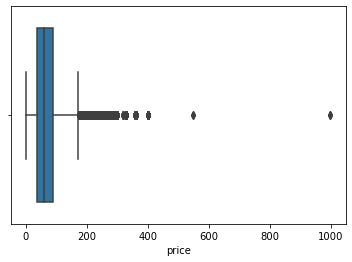

In [16]:
sns.boxplot(x="price", data=df)

In [17]:
df[['price']].describe()

,price
count,441673.000000
mean,70.133408
std,45.340828
min,0.000000
25%,34.900000
50%,59.900000
75%,89.900000
max,999.000000


Dapat dilihat pada boxplot di atas serta analisis atribut untuk menampilkan distribusi, bahwa atribut untuk price terdapat nilai ekstrim (outlier) di atas value +- 180. Lower Quartile diperoleh pada value 34.9, Upper Quartile diperoleh pada value 89.9 sedangkan median diperoleh pada value 59.9.

## Persiapan Dataset

In [18]:
# Menghapus kolom yang terdapat tipe data string, agar dapat dibuat modelnya dengan naive bayes
df = df.drop(columns=['color', 'salutation', 'state', 'orderDate', 
                        'deliveryDate', 'dateOfBirth', 'creationDate', 'size'])
df.head()

,orderItemID,itemID,manufacturerID,price,customerID,returnShipment
0,1,186,25,69.90,794,0
1,2,71,21,69.95,794,1
2,3,71,21,69.95,794,1
4,5,151,53,29.90,825,0
5,6,598,87,89.90,825,0


In [19]:
# import library
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [20]:
Y = (df.returnShipment) # Y = nama variabel, ambil kolom returnShipment kemudian simpan di Y

In [21]:
Y.head() #data dari kolom returnShipment

0    0
1    1
2    1
4    0
5    0
Name: returnShipment, dtype: int64

In [22]:
X = df.drop("returnShipment", axis=1) # drop kolom returnShipment kemudian simpan di X, axis = 1 (kolom)

In [23]:
X.head() # menampilkan data 5 teratas

,orderItemID,itemID,manufacturerID,price,customerID
0,1,186,25,69.90,794
1,2,71,21,69.95,794
2,3,71,21,69.95,794
4,5,151,53,29.90,825
5,6,598,87,89.90,825


### Split Dataset

In [24]:
# split dataset
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=123)

In [25]:
X_train

,orderItemID,itemID,manufacturerID,price,customerID
225617,225618,2086,56,31.95,52500
221257,221258,264,6,39.90,21517
480751,480752,2394,32,39.90,30564
340566,340567,2725,5,59.90,62630
130049,130050,211,1,59.90,35890
...,...,...,...,...,...
212465,212466,1468,3,59.90,50193
19313,19314,33,5,59.90,6744
30771,30772,48,3,24.90,6488
307284,307285,1747,1,119.90,49444


In [26]:
X_test

,orderItemID,itemID,manufacturerID,price,customerID
243874,243875,1642,113,59.9,50902
315494,315495,1788,20,99.9,11751
94333,94334,22,14,24.9,10550
54455,54456,365,71,9.9,19820
119779,119780,560,1,54.9,25690
...,...,...,...,...,...
277711,277712,1505,102,49.9,60472
423738,423739,2371,46,29.9,23958
62533,62534,342,1,129.9,10522
211087,211088,1517,6,69.9,4127


In [27]:
Y_train

225617    1
221257    1
480751    1
340566    1
130049    0
         ..
212465    1
19313     1
30771     0
307284    0
275570    0
Name: returnShipment, Length: 353338, dtype: int64

In [28]:
Y_test

243874    1
315494    0
94333     0
54455     1
119779    0
         ..
277711    1
423738    0
62533     1
211087    1
56416     1
Name: returnShipment, Length: 88335, dtype: int64

In [29]:
#simpan nama kolom untuk keperluan prediksi nanti
import pickle
with open('C:\\Users\\Lenovo\\datmin python\\shipment_x_train_columns.pickle', 'wb') as fp:
    pickle.dump(X_train.columns, fp)

In [30]:
# import library
from sklearn.metrics import classification_report, make_scorer, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix #untuk menampilkan confusion matrix

# Pembuatan Model

## Naive Bayes

Pembuatan model dengan menggunakan metode naive bayes

In [31]:
# import library
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

clf_NB = GaussianNB()                           
clf_NB.fit(X_train, Y_train) # untuk memilih data train yang mana              

Y_pred = clf_NB.predict(X_test) # untuk memprediksi menggunakan data x_test disimpan di Y_pred              
acc = accuracy_score(Y_test, Y_pred)

print("Akurasi {}".format(acc)) # menampilkan akurasi                  
print(classification_report(Y_test, Y_pred)) 

print(confusion_matrix(Y_test, Y_pred)) # untuk menampilkan confusion matrix

print("\n\n~~~~~~~~~~~~~~~~~~~~~~Cross Validation~~~~~~~~~~~~~~~~~~~~\n\n")

def classification_report_with_f1_score(y_true, y_pred):
    print(classification_report(y_true, y_pred))
    print(confusion_matrix(y_true, y_pred))
    return f1_score(y_true, y_pred)

scores = cross_val_score(clf_NB, X=X, y=Y, cv=4, scoring=make_scorer(classification_report_with_f1_score))
print(scores)

Akurasi 0.5719929812645045
              precision    recall  f1-score   support

           0       0.55      0.55      0.55     41900
           1       0.59      0.59      0.59     46435

    accuracy                           0.57     88335
   macro avg       0.57      0.57      0.57     88335
weighted avg       0.57      0.57      0.57     88335

[[23210 18690]
 [19118 27317]]


~~~~~~~~~~~~~~~~~~~~~~Cross Validation~~~~~~~~~~~~~~~~~~~~


              precision    recall  f1-score   support

           0       0.51      0.73      0.60     52396
           1       0.60      0.37      0.46     58023

    accuracy                           0.54    110419
   macro avg       0.55      0.55      0.53    110419
weighted avg       0.56      0.54      0.52    110419

[[38103 14293]
 [36644 21379]]
              precision    recall  f1-score   support

           0       0.56      0.56      0.56     52396
           1       0.60      0.60      0.60     58022

    accuracy                  

Dengan menggunakan model Naive Bayes, dapat diketahui

[0.45635306 0.59796589 0.60880507 0.6896748]

Cross validation, jika menggunakan model Naive Bayes, nilai suppoert f1-score pada returnShipment 1 tidak mengalami perubahan setiap kali syntax predict dan accuracy score dijalankan, yaitu tetap pada 58023

Dari output di atas, nilai f1-score mengalami peningkatan tiap cross validation dengan menggunakan model Naive Bayes. Pula, setiap kali model Naive Bayes dijalankan nilai f1 score selalu sama

Dari penjelasan di atas, disimpulkan bahwa kinerja model Naive Bayes ialah stabil dan konsisten

## Decision Tree

In [32]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
acc = accuracy_score(Y_test, Y_pred)
print("Akurasi {}".format(acc))
print(classification_report(Y_test, Y_pred))

Akurasi 0.5821701477330616
              precision    recall  f1-score   support

           0       0.56      0.55      0.55     41900
           1       0.60      0.61      0.61     46435

    accuracy                           0.58     88335
   macro avg       0.58      0.58      0.58     88335
weighted avg       0.58      0.58      0.58     88335



Jika menggunakan Decision Tree, diperoleh hasil pada f1-score (1 : pengembalian barang), yaitu dengan nilai 0.61

## Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=50, random_state=123)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
acc = accuracy_score(Y_test, Y_pred)
print("Akurasi {}".format(acc))
print(classification_report(Y_test, Y_pred))

Akurasi 0.6002716929869247
              precision    recall  f1-score   support

           0       0.58      0.56      0.57     41900
           1       0.61      0.64      0.63     46435

    accuracy                           0.60     88335
   macro avg       0.60      0.60      0.60     88335
weighted avg       0.60      0.60      0.60     88335



Jika menggunakan Random Forest, diperoleh hasilnya dengan peningkatan pada f1-score (1 : pengembalian barang), yaitu dengan nilai 0.63

## XGBOOST

In [34]:
import xgboost as xgb
clf = xgb.XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic')
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
acc = accuracy_score(Y_test, Y_pred)
print("Akurasi {}".format(acc))
print(classification_report(Y_test, Y_pred))

D:\apps\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
D:\apps\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
D:\apps\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[20:40:04] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Akurasi 0.5880455085753099
              precision    recall  f1-score   support

           0       0.63      0.31      0.42     41900
           1       0.57      0.84      0.68     46435

    accuracy                           0.59     88335
   macro avg       0.60      0.57      0.55     88335
weighted avg       0.60      0.59      0.56     88335



Jika menggunakan Xgboost, hasilnya lebih baik lagi terlihat peningkatan pada f1-score (1 : pengembalian barang) dengan nilai 0.68

# Menyimpan Model dan Memprediksi Data Baru

## Menyimpan Model

In [35]:
import joblib
import pandas as pd
joblib.dump(clf, "C:\\Users\\Lenovo\\datmin python\\xgboost_orders_train.joblib")

['C:\\Users\\Lenovo\\datmin python\\xgboost_orders_train.joblib']

## Praproses Dataset orders_class.txt

Menjalankan praproses yang sama dengan praproses data train

### Load Dataset

In [36]:
df = pd.read_csv("C:\\Users\\Lenovo\\datmin python\\orders_class.txt", sep=';', encoding='utf-8')
df.head()

,orderItemID,orderDate,deliveryDate,itemID,size,color,manufacturerID,price,customerID,salutation,dateOfBirth,state,creationDate
0,1,2013-04-01,2013-04-03,2347,43,magenta,1,89.9,12489,Mrs,1963-04-26,Hesse,2012-04-23
1,2,2013-04-01,2013-04-03,2741,43,grey,1,99.9,12489,Mrs,1963-04-26,Hesse,2012-04-23
2,3,2013-04-01,2013-04-03,2514,9,ecru,19,79.9,12489,Mrs,1963-04-26,Hesse,2012-04-23
3,4,2013-04-01,2013-05-06,2347,42,brown,1,89.9,12489,Mrs,1963-04-26,Hesse,2012-04-23
4,5,2013-04-01,?,2690,43,grey,1,119.9,12489,Mrs,1963-04-26,Hesse,2012-04-23


In [37]:
#menampilkan dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50078 entries, 0 to 50077
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   orderItemID     50078 non-null  int64  
 1   orderDate       50078 non-null  object 
 2   deliveryDate    50078 non-null  object 
 3   itemID          50078 non-null  int64  
 4   size            50078 non-null  object 
 5   color           50078 non-null  object 
 6   manufacturerID  50078 non-null  int64  
 7   price           50078 non-null  float64
 8   customerID      50078 non-null  int64  
 9   salutation      50078 non-null  object 
 10  dateOfBirth     50078 non-null  object 
 11  state           50078 non-null  object 
 12  creationDate    50078 non-null  object 
dtypes: float64(1), int64(4), object(8)
memory usage: 5.0+ MB


In [38]:
#melihat apakah terdapat value null dalam suatu atribut
df.isnull().sum()

orderItemID       0
orderDate         0
deliveryDate      0
itemID            0
size              0
color             0
manufacturerID    0
price             0
customerID        0
salutation        0
dateOfBirth       0
state             0
creationDate      0
dtype: int64

### Cek Setiap Kolom yang Memiliki Value '?'

In [39]:
#buat variabel baru berupa kolom1, kolom2, dan kolom3 untuk menyimpan hasil kolom yang memiliki value '?'
kolom1 = df[df['color'] == '?'] 
kolom2 = df[df['deliveryDate'] == '?'] 
kolom3 = df[df['dateOfBirth'] == '?'] 

# command untuk menampilkan tabel 
kolom1
# kolom2
# kolom3

,orderItemID,orderDate,deliveryDate,itemID,size,color,manufacturerID,price,customerID,salutation,dateOfBirth,state,creationDate


Tabel di atas tidak memiliki data dikarenakan kolom 'color' dalam dataset order_class tidak memiliki value '?'

### Menyimpan dan Menampilkan Nilai Modus Kolom 'color', 'deliveryDate', dan 'dateOfBirth'

In [40]:
#buat variabel untuk menyimpan modus
modus_color = df['color'].mode()
modus_del_date = df['deliveryDate'].mode()
modus_birth = df['dateOfBirth'].mode()

In [41]:
#menampilkan modus
print(modus_color)
print(modus_del_date)
print(modus_birth)

0    black
Name: color, dtype: object
0    ?
Name: deliveryDate, dtype: object
0    ?
Name: dateOfBirth, dtype: object


Kolom 'color' memiliki nilai modus 'black'. Sedangkan kolom 'deliveryDate' dan 'dateOfBirth' memiliki nilai modus '?'

In [42]:
#Replace Karakter '?' Menjadi String Menggunakan Pandas
df.color = df.color.str.replace('?', 'String color')
df.dateOfBirth = df.deliveryDate.str.replace('?', 'String delivery')
df.deliveryDate = df.dateOfBirth.str.replace('?', 'String birthDate')

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14556\2010316146.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.color = df.color.str.replace('?', 'String color')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14556\2010316146.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.dateOfBirth = df.deliveryDate.str.replace('?', 'String delivery')
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_14556\2010316146.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.deliveryDate = df.dateOfBirth.str.replace('?', 'String birt

In [43]:
#menampilkan data teratas
df.head()

,orderItemID,orderDate,deliveryDate,itemID,size,color,manufacturerID,price,customerID,salutation,dateOfBirth,state,creationDate
0,1,2013-04-01,2013-04-03,2347,43,magenta,1,89.9,12489,Mrs,2013-04-03,Hesse,2012-04-23
1,2,2013-04-01,2013-04-03,2741,43,grey,1,99.9,12489,Mrs,2013-04-03,Hesse,2012-04-23
2,3,2013-04-01,2013-04-03,2514,9,ecru,19,79.9,12489,Mrs,2013-04-03,Hesse,2012-04-23
3,4,2013-04-01,2013-05-06,2347,42,brown,1,89.9,12489,Mrs,2013-05-06,Hesse,2012-04-23
4,5,2013-04-01,String delivery,2690,43,grey,1,119.9,12489,Mrs,String delivery,Hesse,2012-04-23


### Hapus Data '?' pada Kolom 'dateOfBirth' dan 'deliveryDate'

In [44]:
# membuang data yang telah dispesifikasikan aka string delivery & string birthDate
df = df[df['deliveryDate'].str.contains('String delivery') == False]
df = df[df['dateOfBirth'].str.contains('String birthDate') == False]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45810 entries, 0 to 50075
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   orderItemID     45810 non-null  int64  
 1   orderDate       45810 non-null  object 
 2   deliveryDate    45810 non-null  object 
 3   itemID          45810 non-null  int64  
 4   size            45810 non-null  object 
 5   color           45810 non-null  object 
 6   manufacturerID  45810 non-null  int64  
 7   price           45810 non-null  float64
 8   customerID      45810 non-null  int64  
 9   salutation      45810 non-null  object 
 10  dateOfBirth     45810 non-null  object 
 11  state           45810 non-null  object 
 12  creationDate    45810 non-null  object 
dtypes: float64(1), int64(4), object(8)
memory usage: 4.9+ MB


In [45]:
#Replace Kolom 'color' dengan Nilai Modus
df.color = df.color.str.replace('String color', 'black') #ganti kolom 'color' dengan black

In [46]:
#menampilkan data 270 ribuan
df.head(270915)

,orderItemID,orderDate,deliveryDate,itemID,size,color,manufacturerID,price,customerID,salutation,dateOfBirth,state,creationDate
0,1,2013-04-01,2013-04-03,2347,43,magenta,1,89.9,12489,Mrs,2013-04-03,Hesse,2012-04-23
1,2,2013-04-01,2013-04-03,2741,43,grey,1,99.9,12489,Mrs,2013-04-03,Hesse,2012-04-23
2,3,2013-04-01,2013-04-03,2514,9,ecru,19,79.9,12489,Mrs,2013-04-03,Hesse,2012-04-23
3,4,2013-04-01,2013-05-06,2347,42,brown,1,89.9,12489,Mrs,2013-05-06,Hesse,2012-04-23
5,6,2013-04-01,2013-04-02,2318,41,blue,1,89.9,3649,Mrs,2013-04-02,Hesse,2013-04-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50071,50072,2013-04-29,2013-05-03,2547,38,ocher,6,79.9,91920,Mrs,2013-05-03,Bavaria,2013-04-29
50072,50073,2013-04-29,2013-05-03,2470,M,white,5,79.9,91920,Mrs,2013-05-03,Bavaria,2013-04-29
50073,50074,2013-04-29,2013-05-03,2342,M,terracotta,5,69.9,91920,Mrs,2013-05-03,Bavaria,2013-04-29
50074,50075,2013-04-29,2013-05-03,2505,M,terracotta,5,64.9,91920,Mrs,2013-05-03,Bavaria,2013-04-29


In [47]:
# Menghapus kolom yang terdapat tipe data string, agar dapat dibuat modelnya dengan naive bayes
df = df.drop(columns=['color', 'salutation', 'state', 'orderDate', 
                        'deliveryDate', 'dateOfBirth', 'creationDate', 'size'])

df.head()

,orderItemID,itemID,manufacturerID,price,customerID
0,1,2347,1,89.9,12489
1,2,2741,1,99.9,12489
2,3,2514,19,79.9,12489
3,4,2347,1,89.9,12489
5,6,2318,1,89.9,3649


In [48]:
df.head()

,orderItemID,itemID,manufacturerID,price,customerID
0,1,2347,1,89.9,12489
1,2,2741,1,99.9,12489
2,3,2514,19,79.9,12489
3,4,2347,1,89.9,12489
5,6,2318,1,89.9,3649


## Prediksi

Menyimpan data order class yang akan digunakan untuk prediksi dalam bentuk pickle, catatan : wb = menulis data 

In [49]:
with open('C:\\Users\\Lenovo\\datmin python\\order_class_prediction.pickle', 'wb') as fp:
    pickle.dump(df.columns, fp)

Proses membuka model dalam bentuk file pickle, catatan : rb = membaca data

In [50]:
with open ('C:\\Users\\Lenovo\\datmin python\\order_class_prediction.pickle', 'rb') as fp:
    X_train_column = list(pickle.load(fp))

df_prediksi = df[X_train_column]

Kemudian, simpan model ke dalam variabel yang bernama clf lakukan prediksi menggunakan fungsi predict dengan parameter yaitu dataframe yang akan diprediksi lalu hasilnya akan disimpan dalam variabel yang bernama hasil_prediksi.

In [51]:
clf = joblib.load("C:\\Users\\Lenovo\\datmin python\\xgboost_orders_train.joblib")
hasil_prediksi = clf.predict(df_prediksi)

#menyimpan hasil prediksi ke dalam .csv
data_hasil_prediksi = pd.DataFrame(hasil_prediksi)
data_hasil_prediksi.head()

data_hasil_prediksi.to_csv('hasil_prediksi.csv', index=False)

In [52]:
#menampilkan output 
hasil_prediksi

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)